K-Means CLustering - Unsupervised Machine Learning algorithm
Clusters are formed on basis of Elucidean distance calculated between each datapoint and centroid

Evaluation metrics are :
Cluster formation:

Inertia:
intra cluster distance: within the cluster, the distance between datapoints should be minimal

inter cluster distance: in between the multiple clusters, the distance should be maximum

Silhoutee score:
the datapoint maintains minimum distance within other datapoints in the cluster and also this datapint maintains maximum distance with other datapoint of other cluster

In [1]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\ML\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install plotly nbformat
     


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\ML\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import plotly.express as px
import nbformat


In [4]:
import pandas as pd
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(path)
df.head()
     


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()
     

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()
     

np.int64(0)

Define X features: These are the features on basis of which clustering should be performed

In [7]:
X = df.drop(columns=["CustomerID","Genre"])
X.head()
     


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
X.columns = ["Age","Income","Spending"]
     


In [10]:
X.head()
     

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Data Preprocessing and Data cleaning

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
     


In [13]:
con_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")
     

In [14]:
con_pipe
     

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [15]:
X_pre = con_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Build the model: K- Means

In [16]:
from sklearn.cluster import KMeans

In [17]:
from yellowbrick.cluster import kelbow_visualizer
     


Matplotlib is building the font cache; this may take a moment.


In [18]:
model = KMeans(n_clusters=5)
model.fit_predict(X_pre)

array([1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1,
       3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

kelbow_visualizer

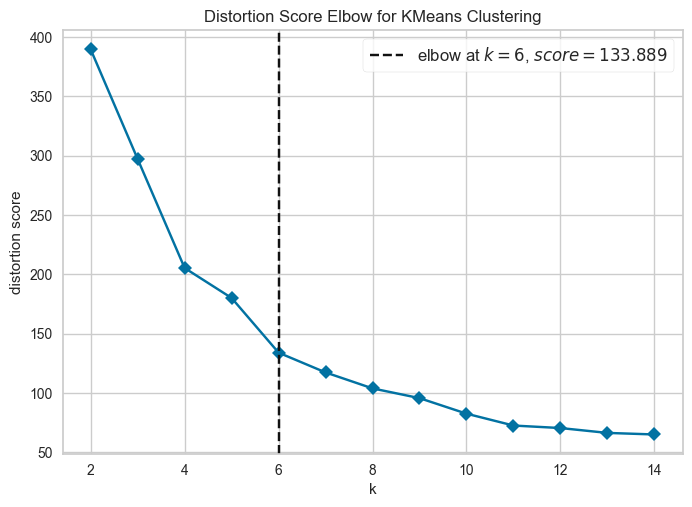

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,X_pre,k=(2,15),timings=False)
visualizer.show()
     

In [20]:
best_kmeans = KMeans(n_clusters=6)
clusters = best_kmeans.fit_predict(X_pre)
clusters
     

array([4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 4,
       1, 0, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 2, 2, 4, 2, 3, 2, 1, 2, 3, 2,
       4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5], dtype=int32)

In [21]:
# Centroids of each cluster
best_kmeans.cluster_centers_
     

array([[-0.97439592, -1.32954532,  1.13217788],
       [ 1.20282188, -0.44641412, -0.34728847],
       [-0.43070888,  0.74317035,  1.2415841 ],
       [ 0.13472565,  1.08669522, -1.29122864],
       [-0.80051062, -0.41883481, -0.22719052],
       [-0.41983513,  2.06703817,  1.0958772 ]])

In [22]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [23]:
X["Clusters"] = clusters
X.head()

,Age,Income,Spending,Clusters
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


In [24]:
for i in range(6):
  print(f"Details of cluster {i}")
  display(X[X["Clusters"]==i])
  print("------------------------")
     

Details of cluster 0


,Age,Income,Spending,Clusters
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0
19,35,23,98,0


------------------------
Details of cluster 1


,Age,Income,Spending,Clusters
8,64,19,3,1
10,67,19,14,1
12,58,20,15,1
18,52,23,29,1
22,46,25,5,1
24,54,28,14,1
26,45,28,32,1
30,60,30,4,1
32,53,33,4,1
34,49,33,14,1


------------------------
Details of cluster 2


,Age,Income,Spending,Clusters
122,40,69,58,2
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2


------------------------
Details of cluster 3


,Age,Income,Spending,Clusters
126,43,71,35,3
130,47,71,9,3
134,20,73,5,3
136,44,73,7,3
138,19,74,10,3
140,57,75,5,3
144,25,77,12,3
146,48,77,36,3
148,34,78,22,3
150,43,78,17,3


------------------------
Details of cluster 4


,Age,Income,Spending,Clusters
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
14,37,20,13,4
16,35,21,35,4
20,35,24,35,4
28,40,29,31,4
38,36,37,26,4
43,31,39,61,4


------------------------
Details of cluster 5


,Age,Income,Spending,Clusters
187,28,101,68,5
189,36,103,85,5
191,32,103,69,5
193,38,113,91,5
195,35,120,79,5
197,32,126,74,5
199,30,137,83,5


------------------------


Metrics:
Inertia

In [27]:
best_kmeans.inertia_

158.51140936049984

Plot the clusters for this model


In [28]:
import plotly.express as px

In [29]:
fig = px.scatter_3d(data_frame=X,x="Age",y="Income",z="Spending",color="Clusters")
fig.show()

Hierarchal Clustering => Agglomerative Clustering
image.png

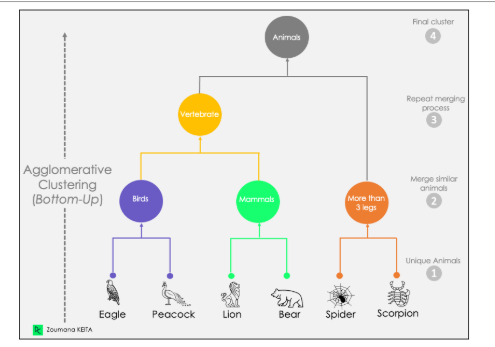

In [30]:
from sklearn.cluster import AgglomerativeClustering
     


In [31]:
X.head()

,Age,Income,Spending,Clusters
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4


In [32]:

Xnew = X.drop(columns=["Clusters"])
Xnew.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [34]:
agc = AgglomerativeClustering(n_clusters=7)
agc.fit(Xnew)
     

AgglomerativeClustering(n_clusters=7)

in a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [35]:
l1 = agc.labels_
l1
     


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 5, 0, 5, 0, 5, 0,
       2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0])

In [36]:
from sklearn.metrics import silhouette_score
     


In [37]:
silhouette_score(Xnew,l1)
     

np.float64(0.4262301125101286)

In [38]:
agc1 = AgglomerativeClustering(n_clusters=4)
agc1.fit(Xnew)

AgglomerativeClustering(n_clusters=4)

In [39]:

l2 = agc1.labels_
l2

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [40]:
silhouette_score(Xnew,l2)

np.float64(0.41037986351850747)

In [41]:
# create a range of data for k clusters
import numpy as np
ks = np.arange(start=2,stop=16,step=1)
ks

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [42]:
sil_scores = []
for i in ks:
  # create a agglomerative model
  agc = AgglomerativeClustering(n_clusters=i)
  agc.fit(Xnew)
  # generate labels and store them
  lab = agc.labels_

  # generate silhoutte score
  ss = silhouette_score(Xnew,lab)

  # add the silhoutte scores to sil_scores
  sil_scores.append(ss)
print(sil_scores)



[np.float64(0.2992593203550994), np.float64(0.38141795042544546), np.float64(0.41037986351850747), np.float64(0.4401889024290193), np.float64(0.44308912983504156), np.float64(0.4262301125101286), np.float64(0.41028404899198817), np.float64(0.3663955117052502), np.float64(0.351820333160781), np.float64(0.3463610714830034), np.float64(0.3410778009986224), np.float64(0.3283549555627869), np.float64(0.3322538056675734), np.float64(0.32842591092474593)]


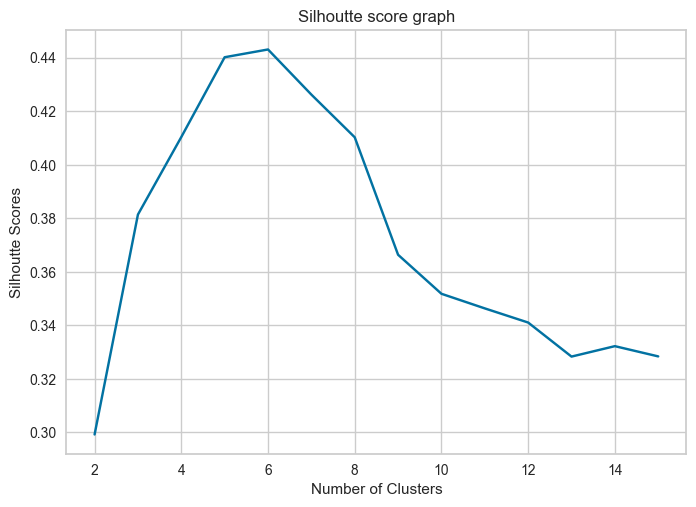

In [43]:
import matplotlib.pyplot as plt
plt.title("Silhoutte score graph")
plt.plot(ks,sil_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Scores")
plt.show()
     

For 6 clusters, we are getting the maximum silhoutte score.


In [44]:
final_agc = AgglomerativeClustering(n_clusters=6)
final_agc.fit(Xnew)
     

AgglomerativeClustering(n_clusters=6)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [45]:
final_agc.labels_
     

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
Xnew["Clusters"] = final_agc.labels_
Dendrogram
Xnew.head()

,Age,Income,Spending,Clusters
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


Dendrogram


C:\Users\hp\AppData\Local\Temp\ipykernel_18620\259734375.py:5: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



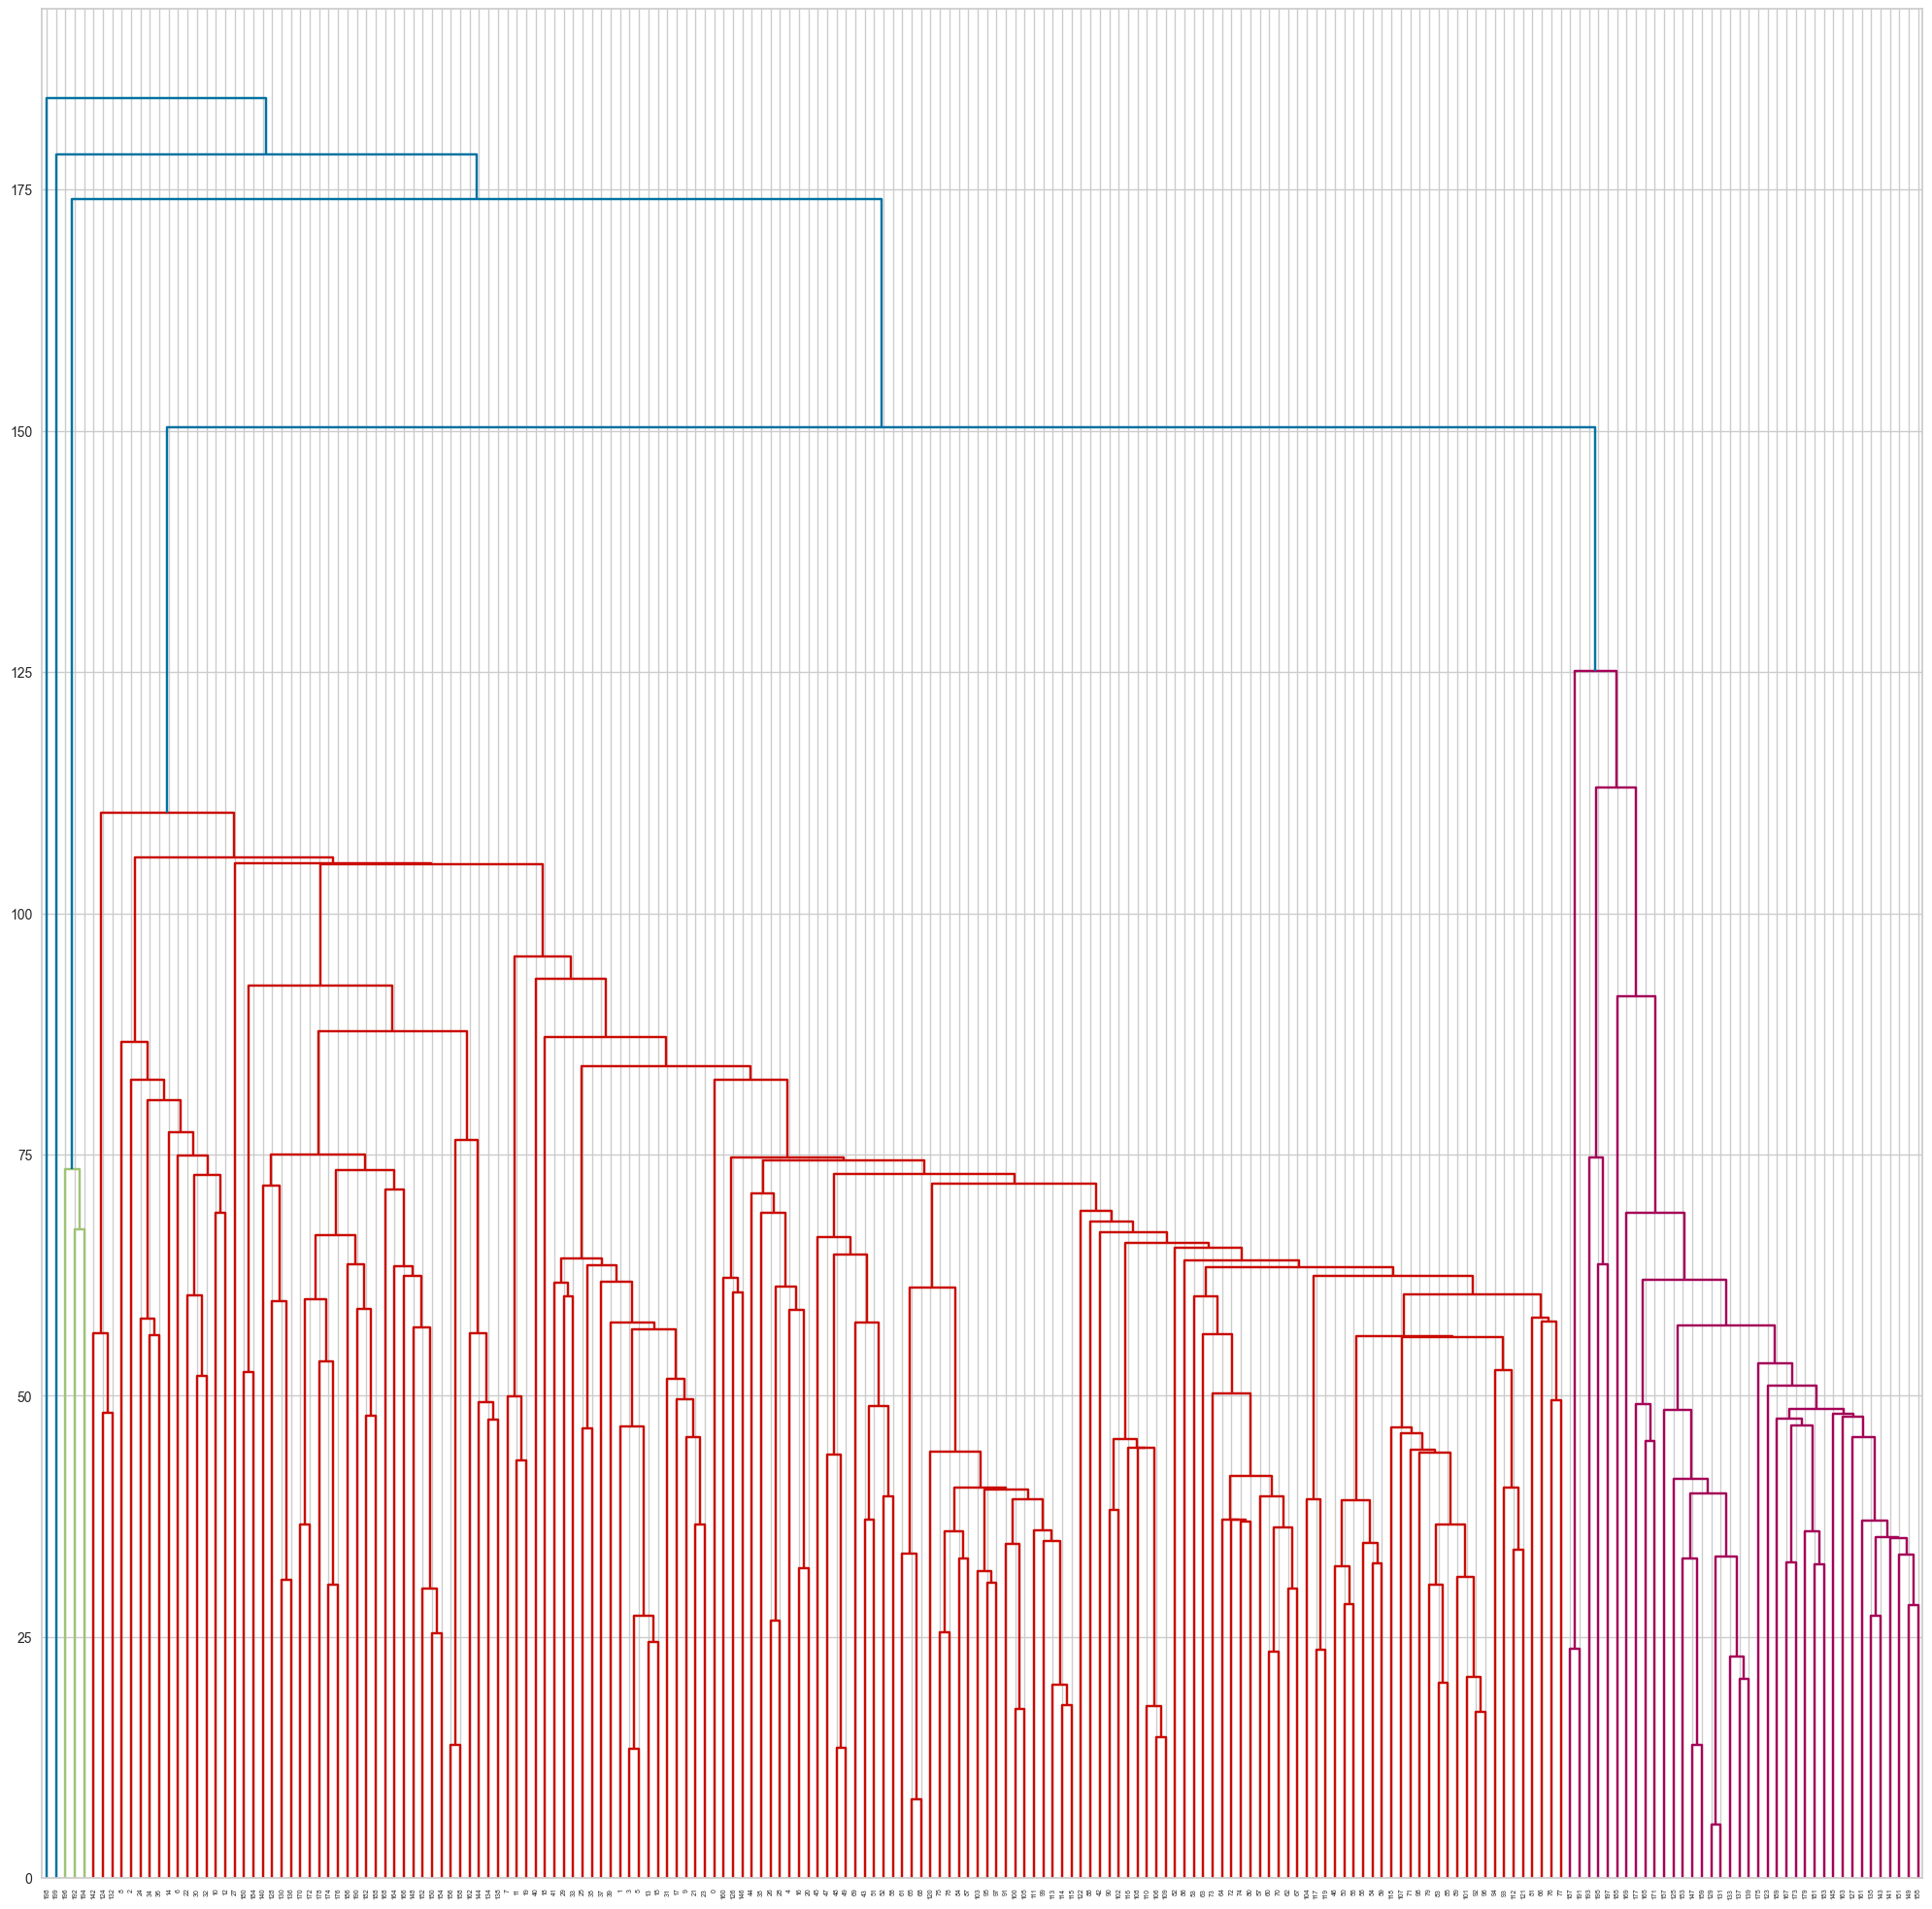

In [47]:
plt.figure(figsize=(25,25))
from scipy.spatial import distance_matrix
DM = distance_matrix(Xnew,Xnew)
from scipy.cluster.hierarchy import linkage
linkages = linkage(DM)
from scipy.cluster.hierarchy import dendrogram
Q = dendrogram(linkages)